Dataset shape: (1460, 81)

Features with missing values:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


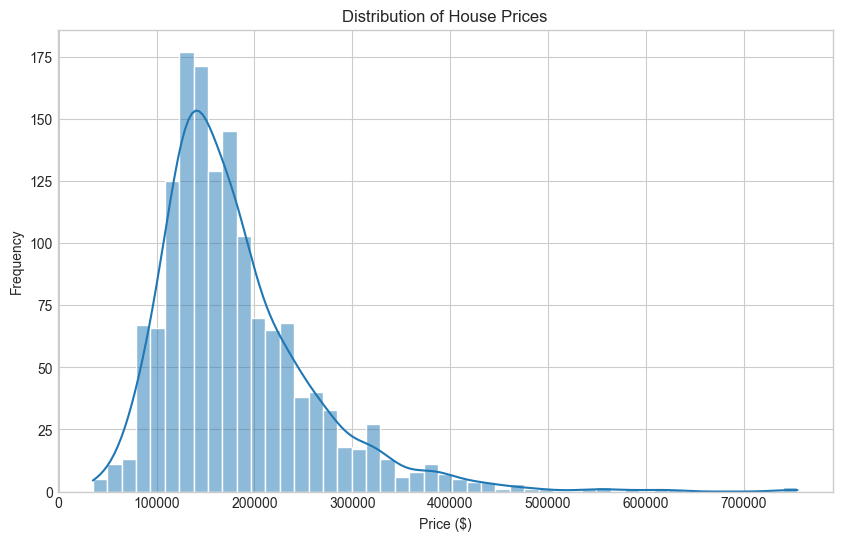


Top 10 features correlated with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


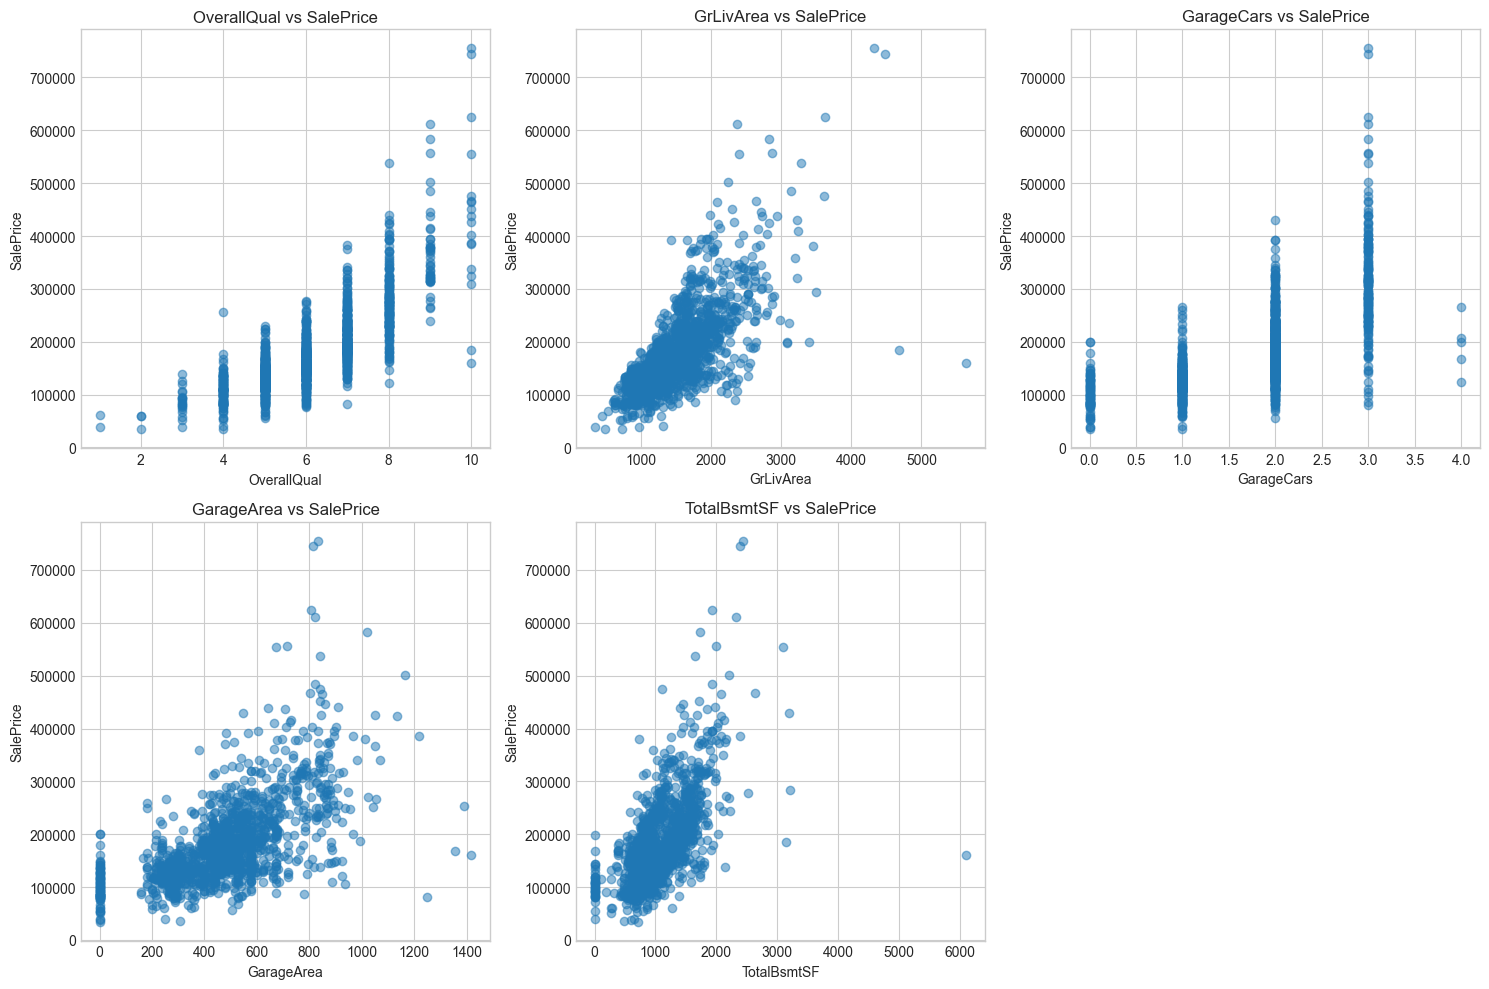

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization defaults
plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

# Load the data
# Update the path to where you downloaded the data
train_data = pd.read_csv('data/train.csv')

# Display basic information
print(f"Dataset shape: {train_data.shape}")
train_data.head()

# Check missing values
missing_values = train_data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("\nFeatures with missing values:")
print(missing_values)

# Explore the target variable (SalePrice)
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

# Let's look at some key numerical correlations
numeric_features = train_data.select_dtypes(include=[np.number])
correlation = numeric_features.corr()['SalePrice'].sort_values(ascending=False)
print("\nTop 10 features correlated with SalePrice:")
print(correlation[1:11])  # Excluding SalePrice's correlation with itself

# Visualize the top 5 correlations
top5_features = correlation[1:6].index
plt.figure(figsize=(15, 10))
for i, feature in enumerate(top5_features, 1):
    plt.subplot(2, 3, i)
    plt.scatter(train_data[feature], train_data['SalePrice'], alpha=0.5)
    plt.title(f'{feature} vs SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
plt.tight_layout()
plt.show()